In [1]:
import numpy as np

def second_order_data(n_samples=500):
    X = np.linspace(-1.0, 1.0, n_samples).reshape(-1,1)
    noise = np.random.randn(n_samples).reshape(-1,1) * 0.15
    y = (X ** 2 + 0.5*X + 0.25 + noise).ravel()
    return X, y

In [2]:
X, y = second_order_data()

In [3]:
import matplotlib.pyplot as plt

def plot_dataset(X, y):
    plt.plot(X, y, 'r+', label='actual')
    plt.xlabel(r'$x1$')
    plt.ylabel(r'$x2$')
    plt.legend()
    
def plot_prediction(regressor, axes, n_samples=100):
    x = np.linspace(axes[0], axes[1], n_samples).reshape(-1,1)
    y_pred = regressor.predict(x)
    plt.plot(x, y_pred, 'k', label='predict', linewidth=2.0)
    plt.legend()

def plot_ensemble_prediction(ensemble_list, axes, n_samples=100):
    x = np.linspace(axes[0], axes[1], n_samples).reshape(-1,1)
    y_pred = sum(reg.predict(x) for reg in ensemble_list)
    plt.plot(x, y_pred, 'k', label='ensemble predict', linewidth=2.0)
    plt.legend()

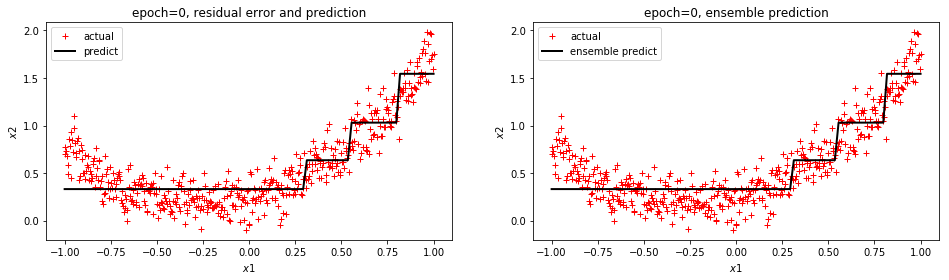

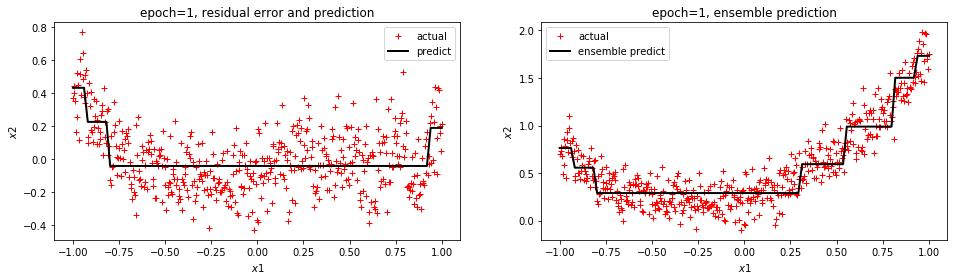

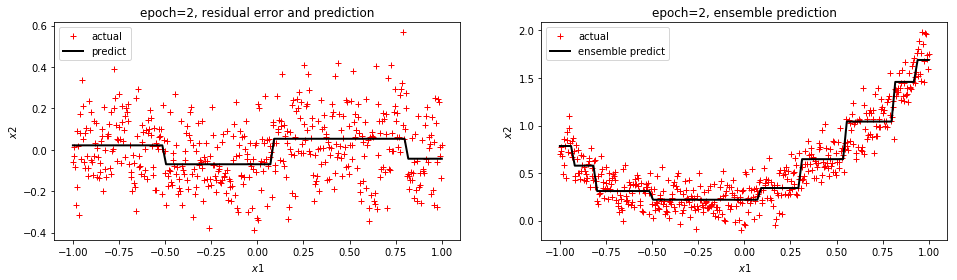

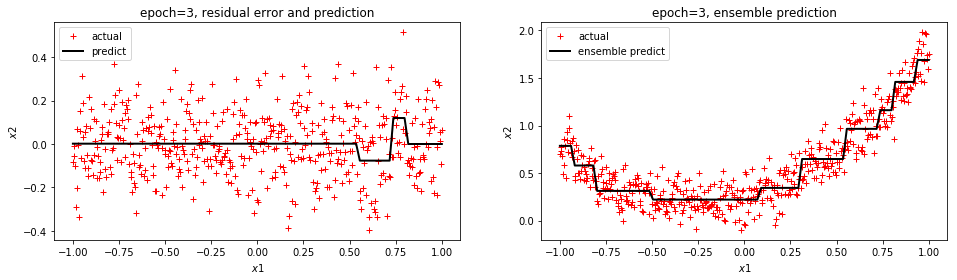

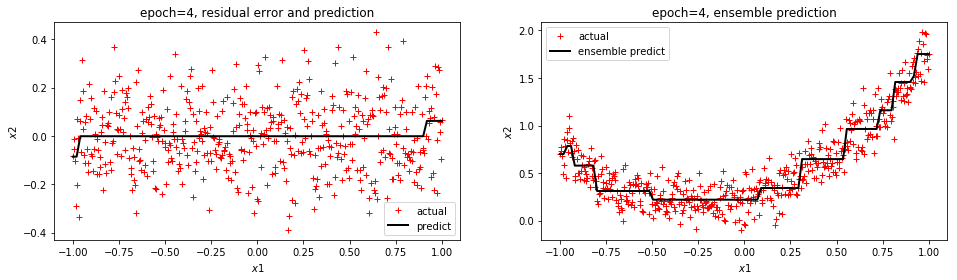

In [4]:
from sklearn.tree import DecisionTreeRegressor

y_residual = y.copy()
ensemble_list = []

axes = [X[:,0].min(), X[:,0].max()]

for epoch in range(5):
    tree_reg = DecisionTreeRegressor(max_depth=2)
    tree_reg.fit(X, y_residual)
    ensemble_list.append(tree_reg)
    plt.figure(figsize=(16,4))
    plt.subplot(121)
    plt.title('epoch={}, residual error and prediction'.format(epoch))
    plot_dataset(X, y_residual)
    plot_prediction(tree_reg, axes)
    plt.subplot(122)
    plt.title('epoch={}, ensemble prediction'.format(epoch))
    plot_dataset(X, y)
    plot_ensemble_prediction(ensemble_list, axes)
    plt.show()
    y_residual -= tree_reg.predict(X)

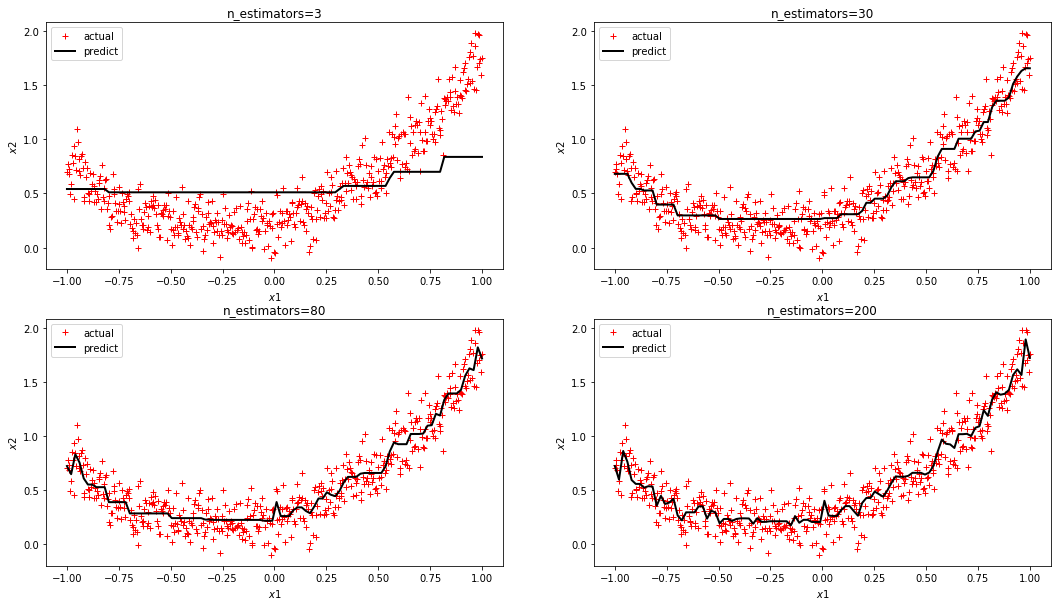

In [5]:
from sklearn.ensemble import GradientBoostingRegressor

plt.figure(figsize=(18,10))

for n_estimators, num_subplot in zip([3, 30, 80, 200], [221, 222, 223, 224]):
    # Gradient Boosted Regression Tree
    gdb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=n_estimators, learning_rate=0.1)
    gdb_reg.fit(X, y)

    plt.subplot(num_subplot)
    plt.title('n_estimators={}'.format(n_estimators))
    plot_dataset(X, y)
    plot_prediction(gdb_reg, axes)

plt.show()

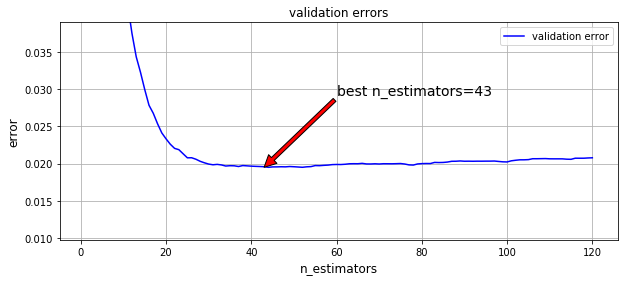

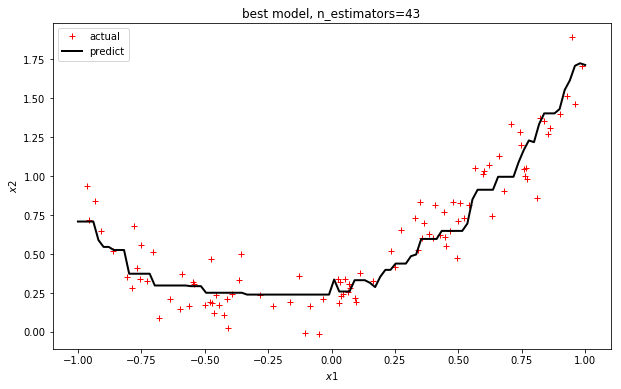

In [6]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

gdb_reg = GradientBoostingRegressor(max_depth=2, n_estimators=120, learning_rate=0.1)
gdb_reg.fit(X_train, y_train)

errors = [mean_squared_error(y_val, y_pred) for y_pred in gdb_reg.staged_predict(X_val)]
best_validation_epoch = np.argmin(errors)
min_error = errors[best_validation_epoch]

epochs = np.arange(120) + 1

plt.figure(figsize=(10,4))
plt.title('validation errors')
plt.plot(epochs, errors, 'b', label='validation error')
plt.xlabel('n_estimators', fontsize=12)
plt.ylabel('error', fontsize=12)
plt.grid()
plt.legend()
plt.annotate('best n_estimators={}'.format(best_validation_epoch),
             xy=(best_validation_epoch, errors[best_validation_epoch]),
             xytext=(60, min_error*1.5),
             fontsize=14,
             arrowprops=dict(facecolor='red'))
plt.ylim([min_error*0.5, min_error*2.0])
plt.show()

best_reg = GradientBoostingRegressor(max_depth=2,
                                     n_estimators=best_validation_epoch,
                                     learning_rate=0.1)
best_reg.fit(X_train, y_train)

plt.figure(figsize=(10,6))
plt.title('best model, n_estimators={}'.format(best_validation_epoch))
plot_dataset(X_val, y_val)
plot_prediction(best_reg, axes)
plt.show()